# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [9]:
# Resolver acá
#!pip install requests
import requests

#busco el producto que quiero
buscar = "termo stanley"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
response = requests.request("GET", url)
print(response)
response.text

# guardo resultados en un diccionario
data = response.json()
data

# guardo resultados en una lista
results = data.get('results', [])

# longitud de la lista de resultados
print('Longitud de lista de resultados:', len(data['results']))

#defino cantidad de productos que quiero ver
limit = min(48, len(results)) 

for i in range(limit):
    product = results[i]
    print(f"ID: {product.get('id')}")
    print(f"Título: {product.get('title')}")
    print(f"Precio: {product.get('price')}")
    print(f"Link: {product.get('permalink')}")
    print(f"Categoría: {product.get('category_id')}")



<Response [200]>
Longitud de lista de resultados: 49
ID: MLA1436049213
Título: Termo Stanley Mate System Classic De Acero Inoxidable 1.2l
Precio: 137664
Link: https://www.mercadolibre.com.ar/termo-stanley-mate-system-classic-de-acero-inoxidable-12l/p/MLA34703283#wid=MLA1436049213&sid=unknown
Categoría: MLA47769
ID: MLA1375139643
Título: Termo Stanley Mate System 1.2 Lts Maple
Precio: 146500
Link: https://www.mercadolibre.com.ar/termo-stanley-mate-system-12-lts-maple/p/MLA23611290#wid=MLA1375139643&sid=unknown
Categoría: MLA47769
ID: MLA1747875686
Título: Stanley Mate System 800ml Negro
Precio: 116869
Link: https://www.mercadolibre.com.ar/stanley-mate-system-800ml-negro/p/MLA21427939#wid=MLA1747875686&sid=unknown
Categoría: MLA47769
ID: MLA1340630676
Título: Termo Stanley Mate System Maple 800ml
Precio: 116320.85
Link: https://www.mercadolibre.com.ar/termo-stanley-mate-system-maple-800ml/p/MLA22098660#wid=MLA1340630676&sid=unknown
Categoría: MLA47769
ID: MLA1420858685
Título: Termo Stan

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [5]:
# Resolver acá
import pandas as pd 
prices = [results[i].get("price") for i in range(limit)]
#precios 
df_items = pd.DataFrame(prices,columns=["Precio"])
precio_promedio = df_items["Precio"].mean()
precio_minimo = df_items["Precio"].min()
precio_maximo = df_items["Precio"].max()

print(f"Precio promedio: {precio_promedio}")
print(f"Precio minimo: {precio_minimo}")
print(f"Precio maximo: {precio_maximo}")


Precio promedio: 127653.38
Precio minimo: 70000.0
Precio maximo: 219000.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

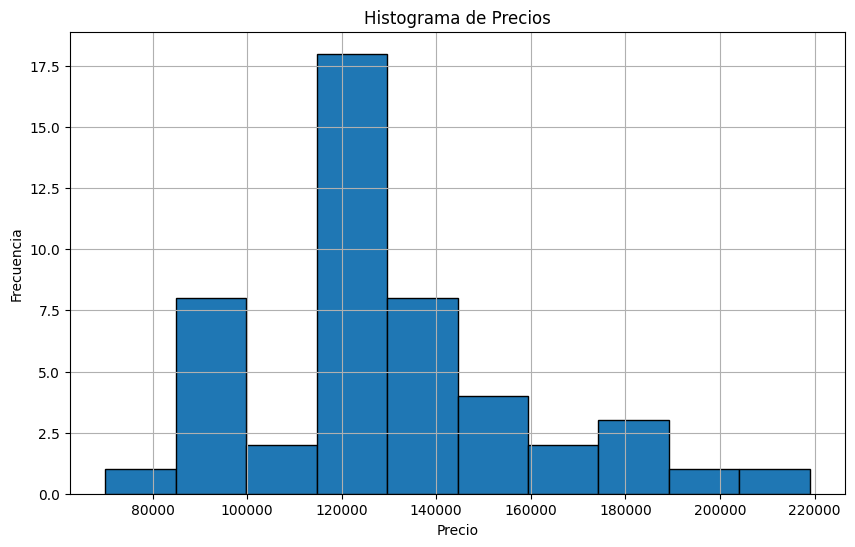

In [6]:
# Resolver acá
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Precio'], bins=10, edgecolor='black')
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#La mayoría de los precios están alrededor de los $120.000. Varían entre $80.000 y $220.000. 

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [1]:
# Resolver acá
import requests
import pandas as pd

# ID de las categorías = termo stanley, mesa ratona y fogonero
category_ids = ["MLA47769", "MLA4749", "MLA417845"]

# Función para obtener precios de productos en una categoría
def obtener_precios_categoria(category_id):
    url = f'https://api.mercadolibre.com/sites/MLA/search?category={category_id}&limit=50'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        prices = [item.get('price') for item in data.get('results', [])]
        return prices
    

# diccionario para almacenar los precios por categoría
precios_por_categoria = {}

# precios para cada categoría
for category_id in category_ids:
    precios = obtener_precios_categoria(category_id)
    precios_por_categoria[category_id] = precios

# DataFrame para almacenar los resultados
resultados = []
for category_id, precios in precios_por_categoria.items():
        df = pd.DataFrame(precios, columns=["Precio"])
        precio_promedio = df["Precio"].mean()
        resultados.append({"Categoria": category_id, "Precio Promedio": precio_promedio})


# DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)



   Categoria  Precio Promedio
0   MLA47769       61194.6094
1    MLA4749       58787.4288
2  MLA417845      234650.9574


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
#Instalo e importo las librerias y paquetes que necesito
!pip install requests
!pip install BeautifulSoup
!pip install pandas

import requests 
from bs4 import BeautifulSoup 
import pandas as pd 
import openpyxl

In [66]:
# Resolver acá

#variable del dominio de origen
url_LN = "https://www.lanacion.com.ar/"

r = requests.get(url_LN) #traigo el contenido del html de La Nacion
contenido = r.content
soup = BeautifulSoup(contenido, "html.parser")

#Dentro de la sopa busco los elementos hyperlink <a href>. 
#Indico que son solo los links de las noticias de la portada (con class_). Aca excluyo hyperlinks que van a otras secciones de la pagina como el clima, por ejemplo.
link_elements = soup.find_all('a', href = True, class_ = "link ln-link flex flex-column --unstyled")

#Creo una lista para guardar los links encontrados
hyperlinks = []

#Para cada elemento encontrado extraigo unicamente el link (extraigo el elemento "href") y lo concateno con el dominio. 
#Tambien agrego el titulo de la noticia
for link_element in link_elements:
    hyperlink = str("https://www.lanacion.com.ar" + link_element['href'])
    titulo_noticia = str(link_element['title'])

    hyperlinks.append({
        'Titulo de noticia' : titulo_noticia, 
        'Link a noticia' : hyperlink         
    })

In [ ]:
#Creo un dataframe con los titulos y links de las noticias de la portada
df_hyperlinks = pd.DataFrame(hyperlinks)
df_hyperlinks

#Exporto el dataframe a un archivo de excel
df_hyperlinks.to_excel('hyperlinksLN.xlsx', index=False)